## Setup


In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

plt.style.use("fivethirtyeight")
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams["lines.linewidth"] = 1.5
plt.rcParams["lines.markersize"] = 8
plt.rcParams["axes.grid"] = True
sns.set_style("darkgrid")
sns.set_context("talk")
sns.set_palette("colorblind")
print("Setup Complete")

Setup Complete


## Load Data

In [2]:
my_filepath = "games.csv"

In [3]:
# Fill in the line below: Read the file into a variable my_data
my_data = pd.read_csv(my_filepath, index_col="id")

In [4]:
# Print the first five rows of the data
my_data.head()

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
id,,,,,,,,,,,,,,,
TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


## Clean Data

In [5]:
def rem_outliers(df, var):
    q_low = df[var].quantile(0.01) #remove outliers
    q_hi = df[var].quantile(0.99)
    df = df[(df[var] < q_hi) & (df[var] > q_low)]
    return df

In [6]:
my_data = my_data.loc[~my_data.index.duplicated(), :]
my_data.flags.allows_duplicate_labels = False

## Visualize the data

In [9]:
my_data = rem_outliers(my_data,'turns')

my_data = rem_outliers(my_data,'opening_ply')

#sns.relplot(data=my_data,x='turns',y='opening_ply', hue='winner')

## White v Black Rating by Match Result

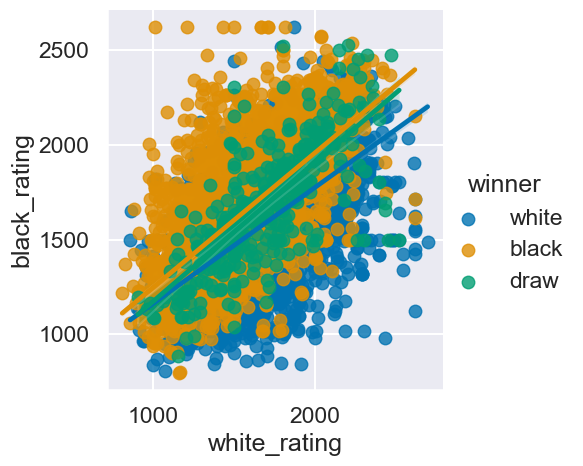

In [17]:
sns.lmplot(data=my_data,x='white_rating',y='black_rating', hue='winner')
#plt.title('Average Rating by Common Genres')
#plt.xlabel("Year")
#plt.ylabel("Average Rating")
#plt.show()

### Unsurprisingly, when white is higher rated than black they tend to win more and vice versa

## Distribution of Turns Taken

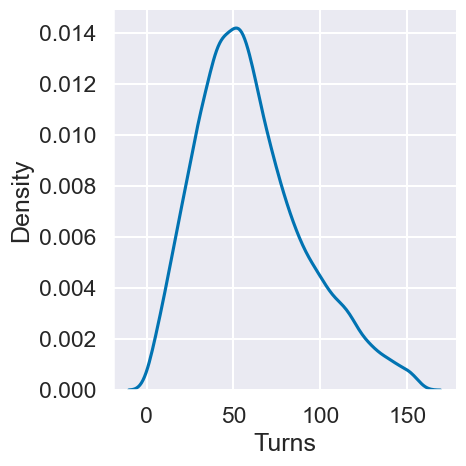

In [11]:
my_data.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
d = sns.displot(data=my_data, x='turns', kind='kde')
d.set_axis_labels("Turns","Density")

### The average game takes about 50 moves, with the data being slightly right skewed

## Distribution of Turns Taken by Match Result

C:\Users\peter\AppData\Local\Temp\ipykernel_17600\1008402076.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=w_wins['turns'], shade=True, label='White')
C:\Users\peter\AppData\Local\Temp\ipykernel_17600\1008402076.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=b_wins['turns'], shade=True, label='Black')
C:\Users\peter\AppData\Local\Temp\ipykernel_17600\1008402076.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=draws['turns'], shade=True, label='Draw')


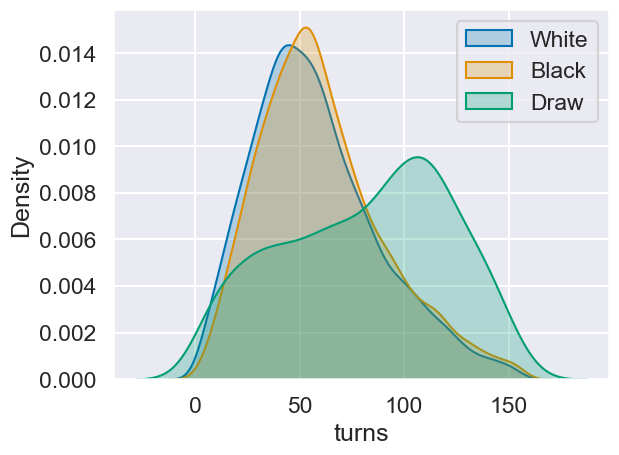

In [12]:
w_wins = my_data.loc[(my_data.winner == 'white')]
b_wins = my_data.loc[(my_data.winner == 'black')] 
draws = my_data.loc[(my_data.winner == 'draw')] 

sns.kdeplot(data=w_wins['turns'], shade=True, label='White')
sns.kdeplot(data=b_wins['turns'], shade=True, label='Black')
sns.kdeplot(data=draws['turns'], shade=True, label='Draw')

plt.legend()

### Games in which Black wins tend to take slightly longer. 
### Games that end in a draw tend to last longer than games that have a winner, as well as this, draws have a higher range of game length. 

C:\Users\peter\AppData\Local\Temp\ipykernel_17600\2235331196.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=rated['turns'], shade=True, label='Rated')
C:\Users\peter\AppData\Local\Temp\ipykernel_17600\2235331196.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=unrated['turns'], shade=True, label='Unrated')


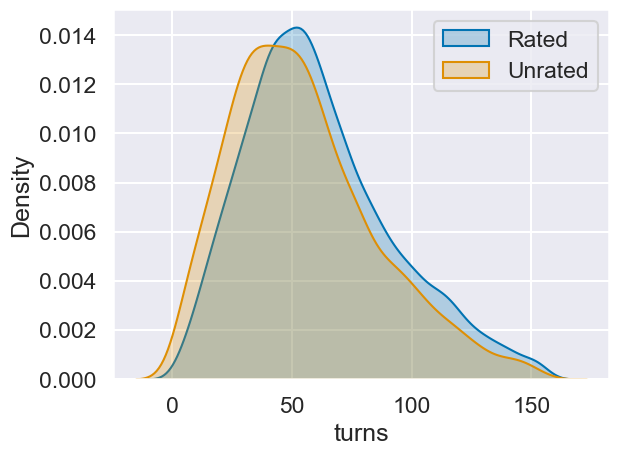

In [13]:
rated = my_data.loc[(my_data.rated == True)]
unrated = my_data.loc[(my_data.rated == False)]

sns.kdeplot(data=rated['turns'], shade=True, label='Rated')
sns.kdeplot(data=unrated['turns'], shade=True, label='Unrated')

plt.legend()

### Rated games tend to last longer than unrated games

## Distribution of Turns by Match Result

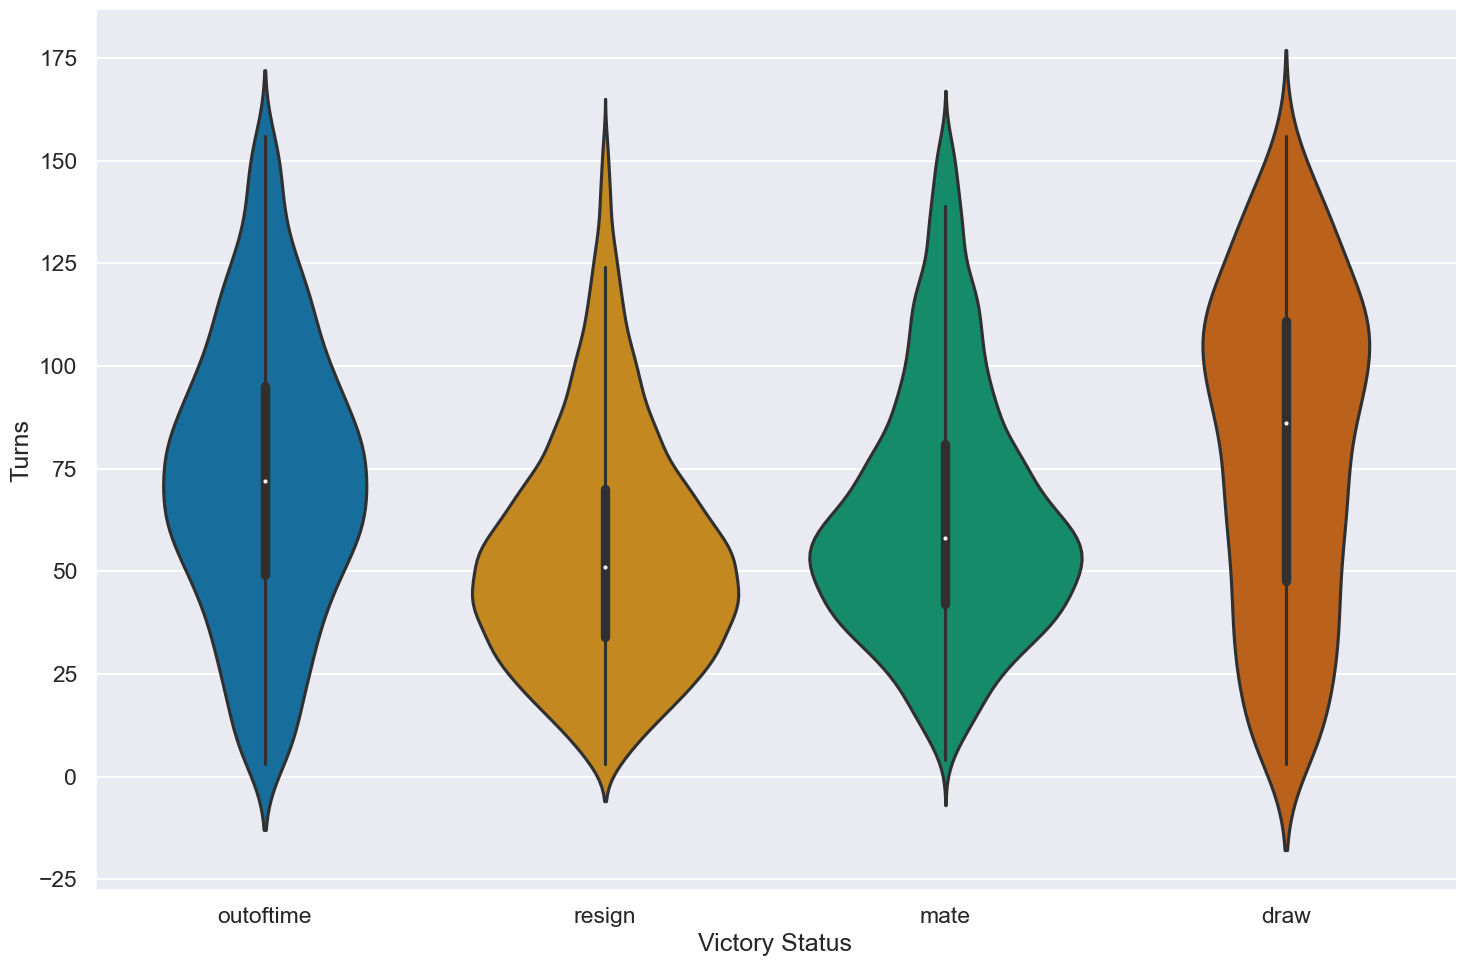

In [15]:
v = sns.catplot(data=my_data, x='victory_status', y='turns', height=10, aspect=1.5, kind='violin')
v.set_axis_labels("Victory Status","Turns")

### Games ending in a draw have the largest inter-quartile range of turns taken compared to other victory status
### Before the 30 move mark, resignations occur more often than mates
### Draws have the largest average number of turns taken, resignations have the lowest

## Distribution of Turns taken by Opening Type

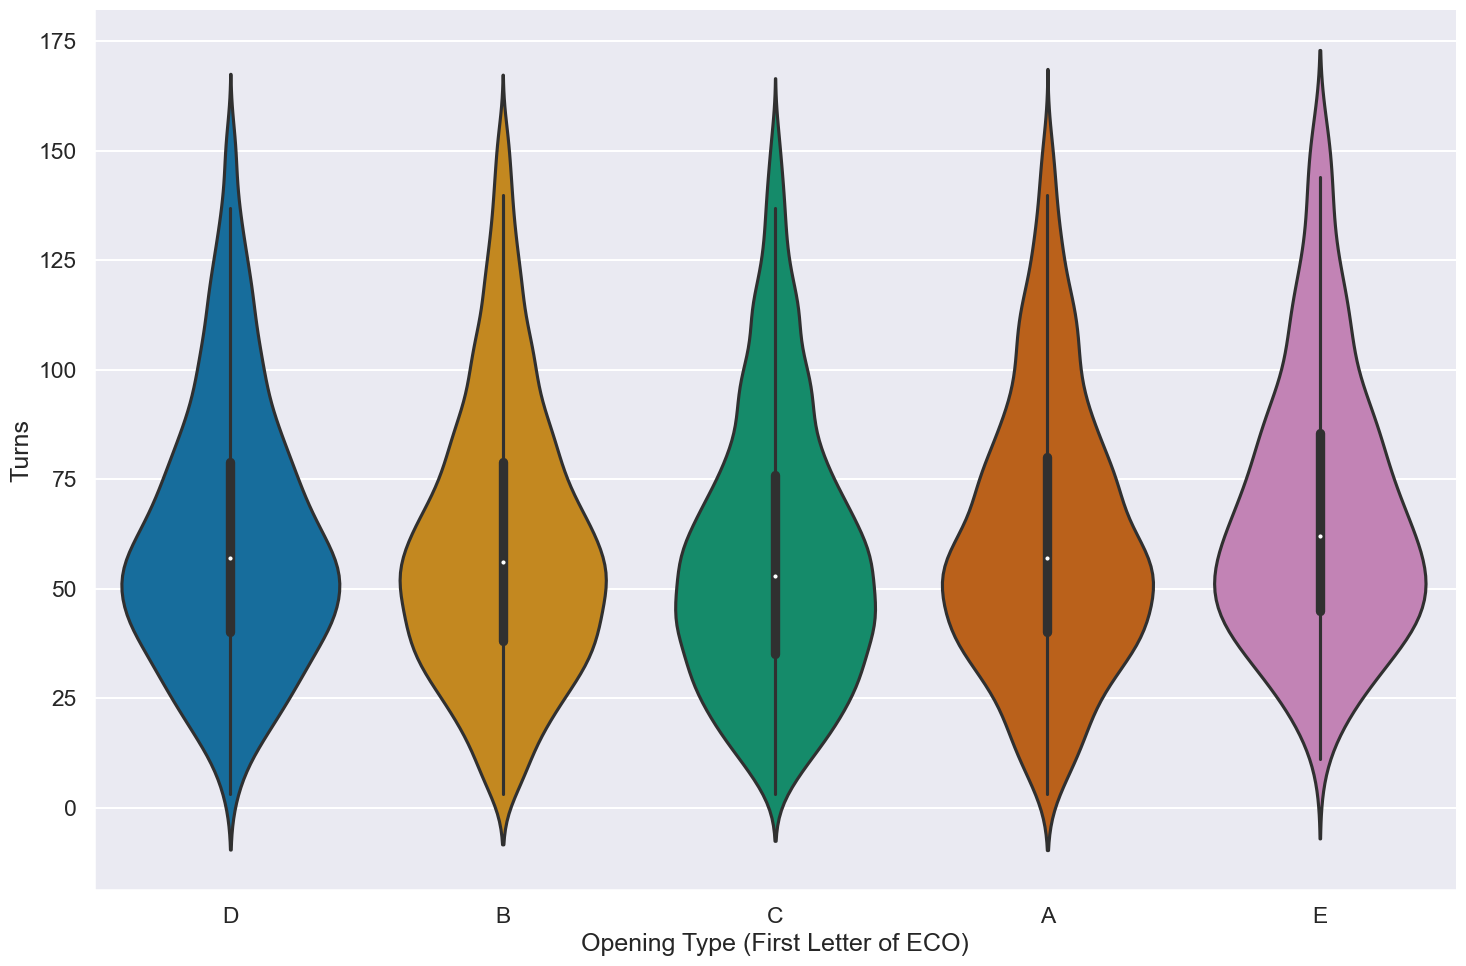

In [16]:
my_data['open_letter'] = my_data['opening_eco'].str[:1]
o = sns.catplot(data=my_data, x='open_letter', y='turns', height=10, aspect=1.5, kind='violin')
o.set_axis_labels("Opening Type (First Letter of ECO)", "Turns")

### Games with an E-type opening had the largest average number of moves, C-type had the lowest

## White Rating (Normalized) by Opening Type

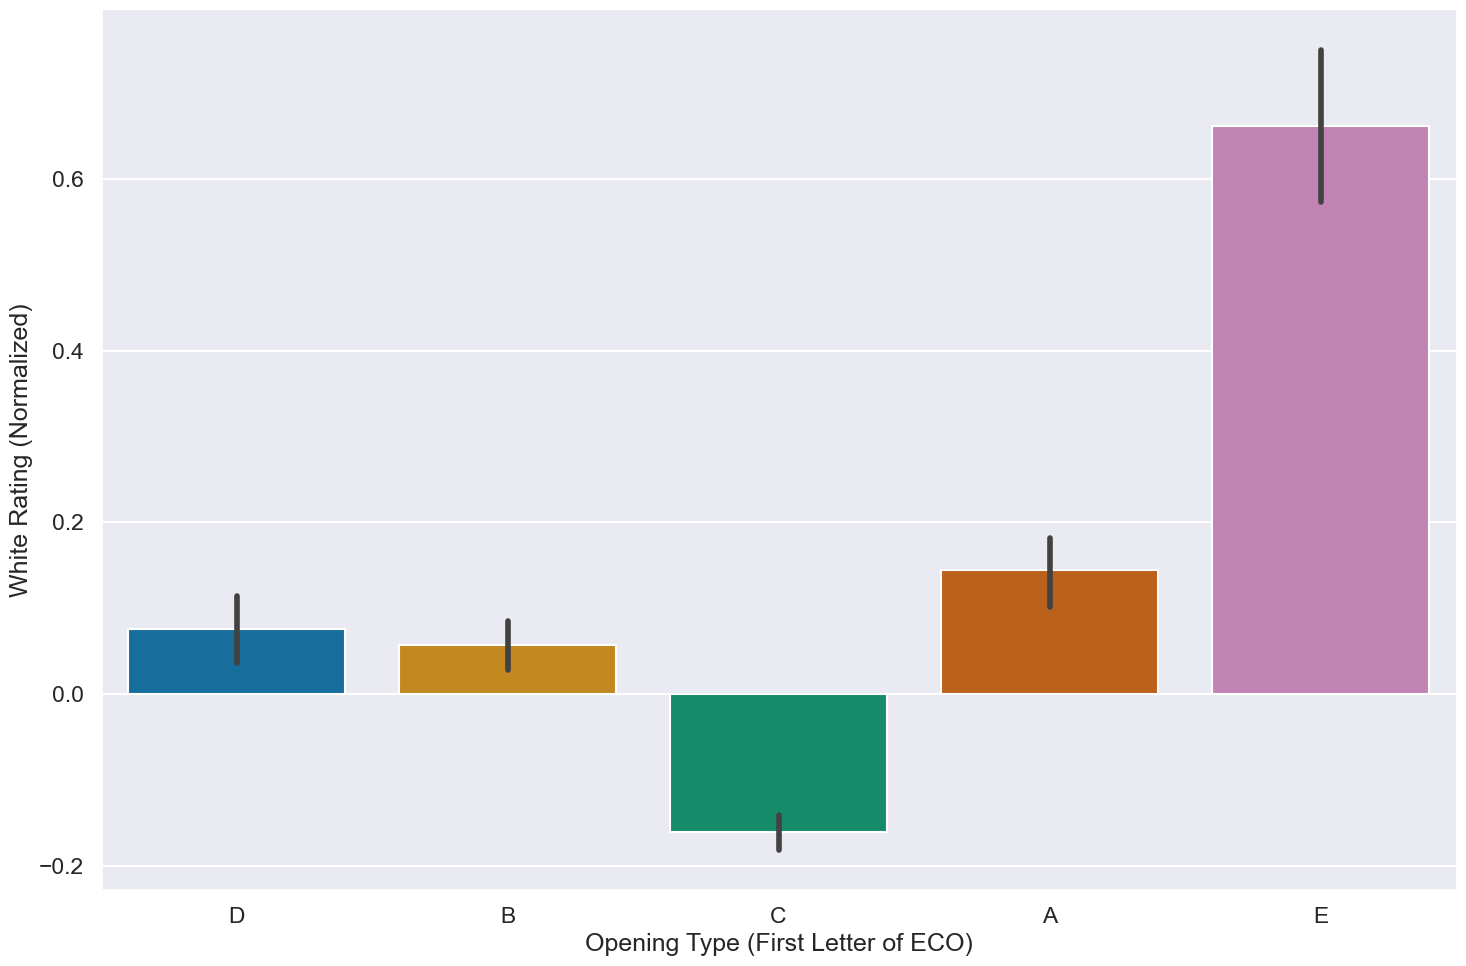

In [17]:
my_data["white_rat_norm"] = (my_data["white_rating"]-my_data["white_rating"].mean()) / my_data["white_rating"].std()
#open_rating_heat = df_filtered.loc[: ,['white_rating','open_letter']]

x = sns.catplot(data=my_data,x="open_letter", y="white_rat_norm", kind='bar', height=10, aspect=1.5)
x.set_axis_labels("Opening Type (First Letter of ECO)", "White Rating (Normalized)")

(B&C are Kings pawn openings. D&E are queens pawn openings. A represents unsual openings.)
### Those who play C openings are more likely to be lower rated. Those who play E openings are much more likely to be a higher rated player.
### (Tip: If you're facing a high level oponent, try an opening they'd be less familiar with, such as from the C-type openings)

## Distribution of White Rating (Normalized) by Opening Type

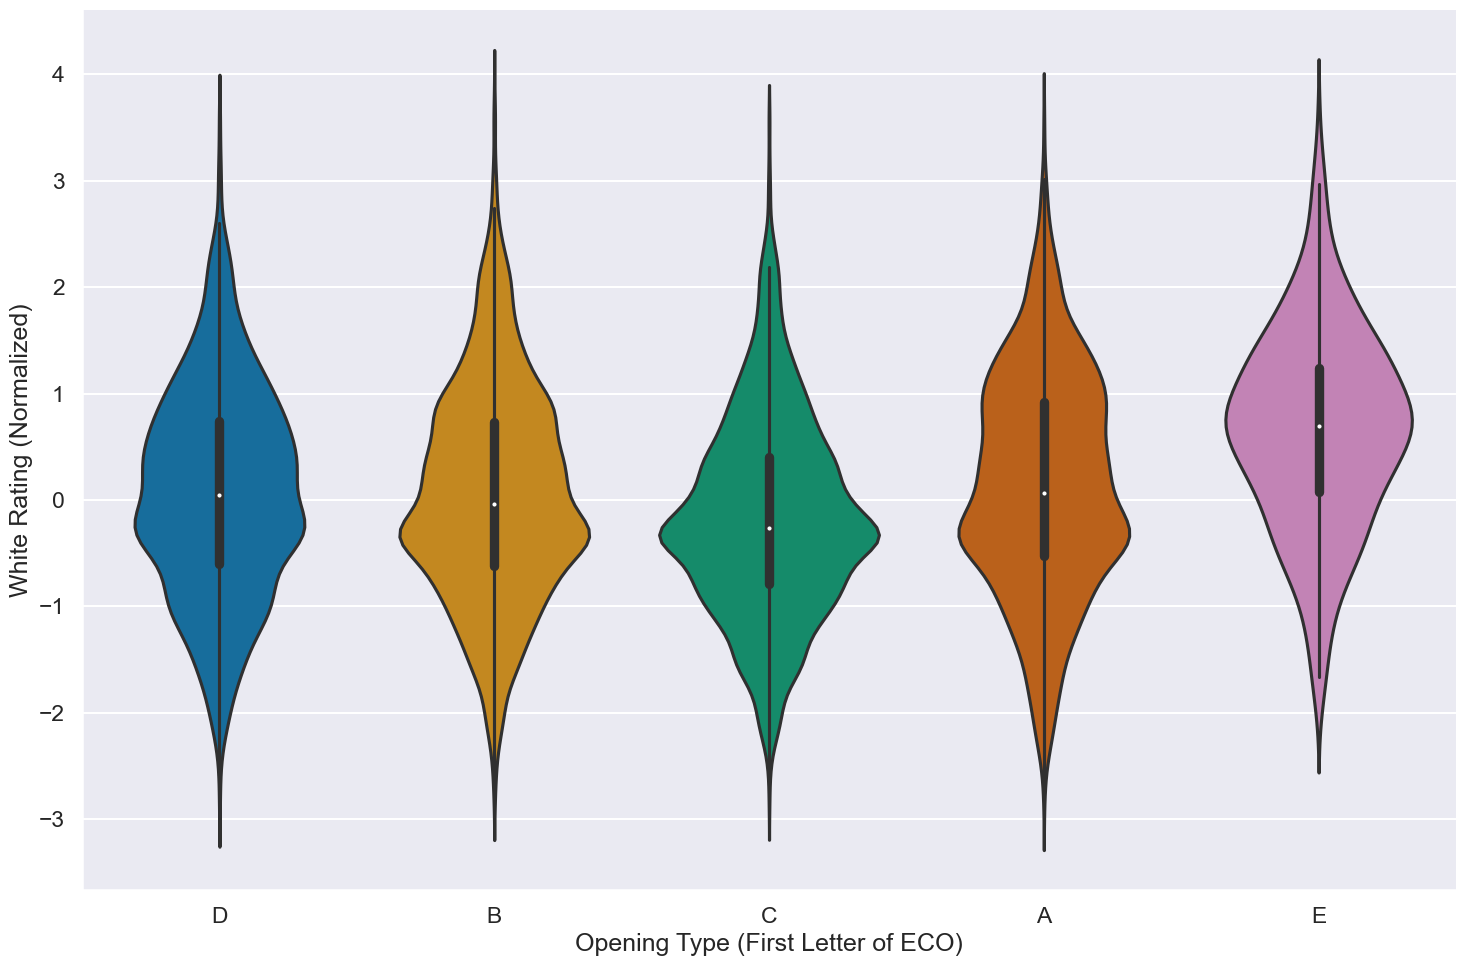

In [18]:
x = sns.catplot(data=my_data,x="open_letter", y="white_rat_norm", kind='violin', height=10, aspect=1.5)
x.set_axis_labels("Opening Type (First Letter of ECO)", "White Rating (Normalized)")

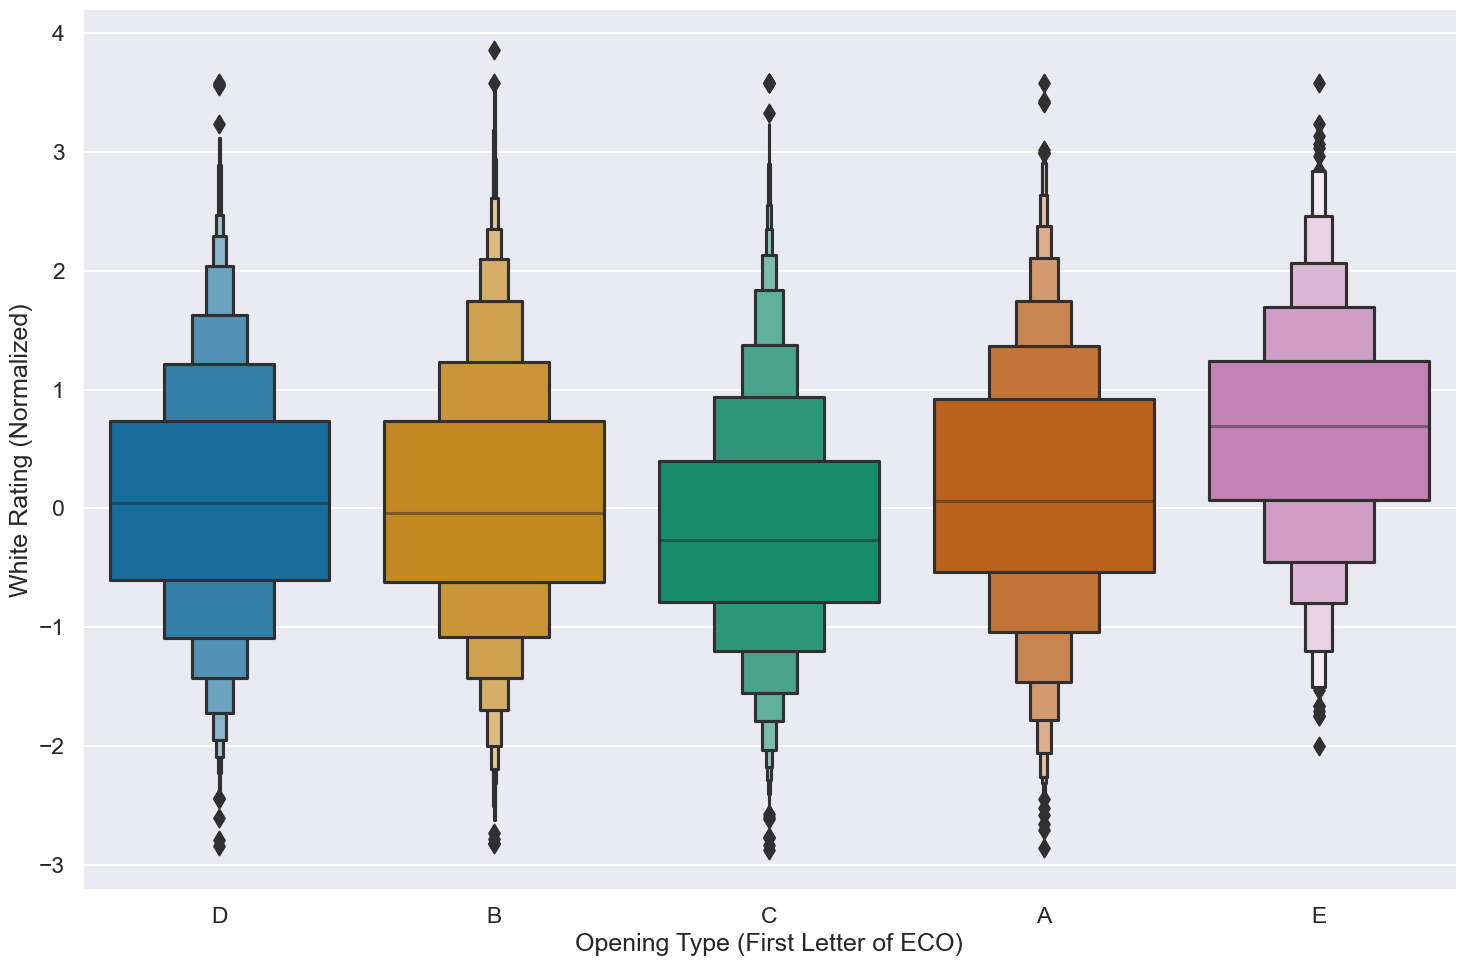

In [19]:
x = sns.catplot(data=my_data,x="open_letter", y="white_rat_norm", kind='boxen', height=10, aspect=1.5)
x.set_axis_labels("Opening Type (First Letter of ECO)", "White Rating (Normalized)")

## White Rating (Normalized) by number of Opening Moves

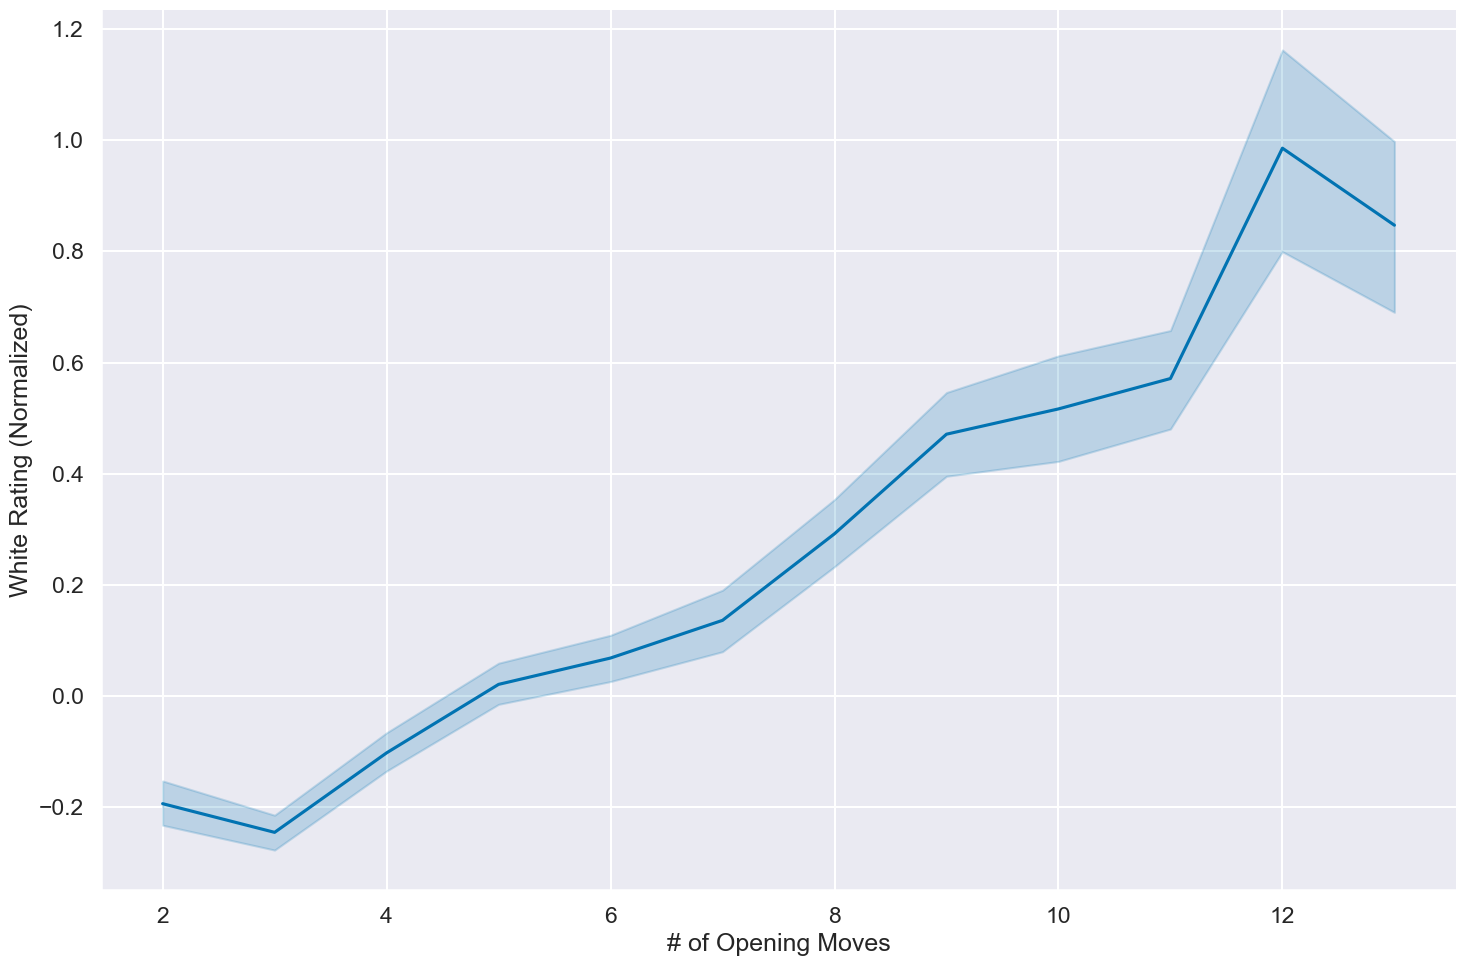

In [20]:
r = sns.relplot(data=my_data, x='opening_ply',y='white_rat_norm', kind='line', height=10, aspect=1.5)
r.set_axis_labels("# of Opening Moves", "White Rating (Normalized)")

### There's a positive correlation between a players rating and the length of the opening phase

## Distribution of Turns taken (Normalized) by Opening Type

C:\Users\peter\AppData\Local\Temp\ipykernel_17600\50910679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_mates["turns_norm"] = (w_mates["turns"]-w_mates["turns"].mean()) / w_mates["turns"].std()
C:\Users\peter\AppData\Local\Temp\ipykernel_17600\50910679.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_mates['open_letter'] = w_mates['opening_eco'].str[:1]


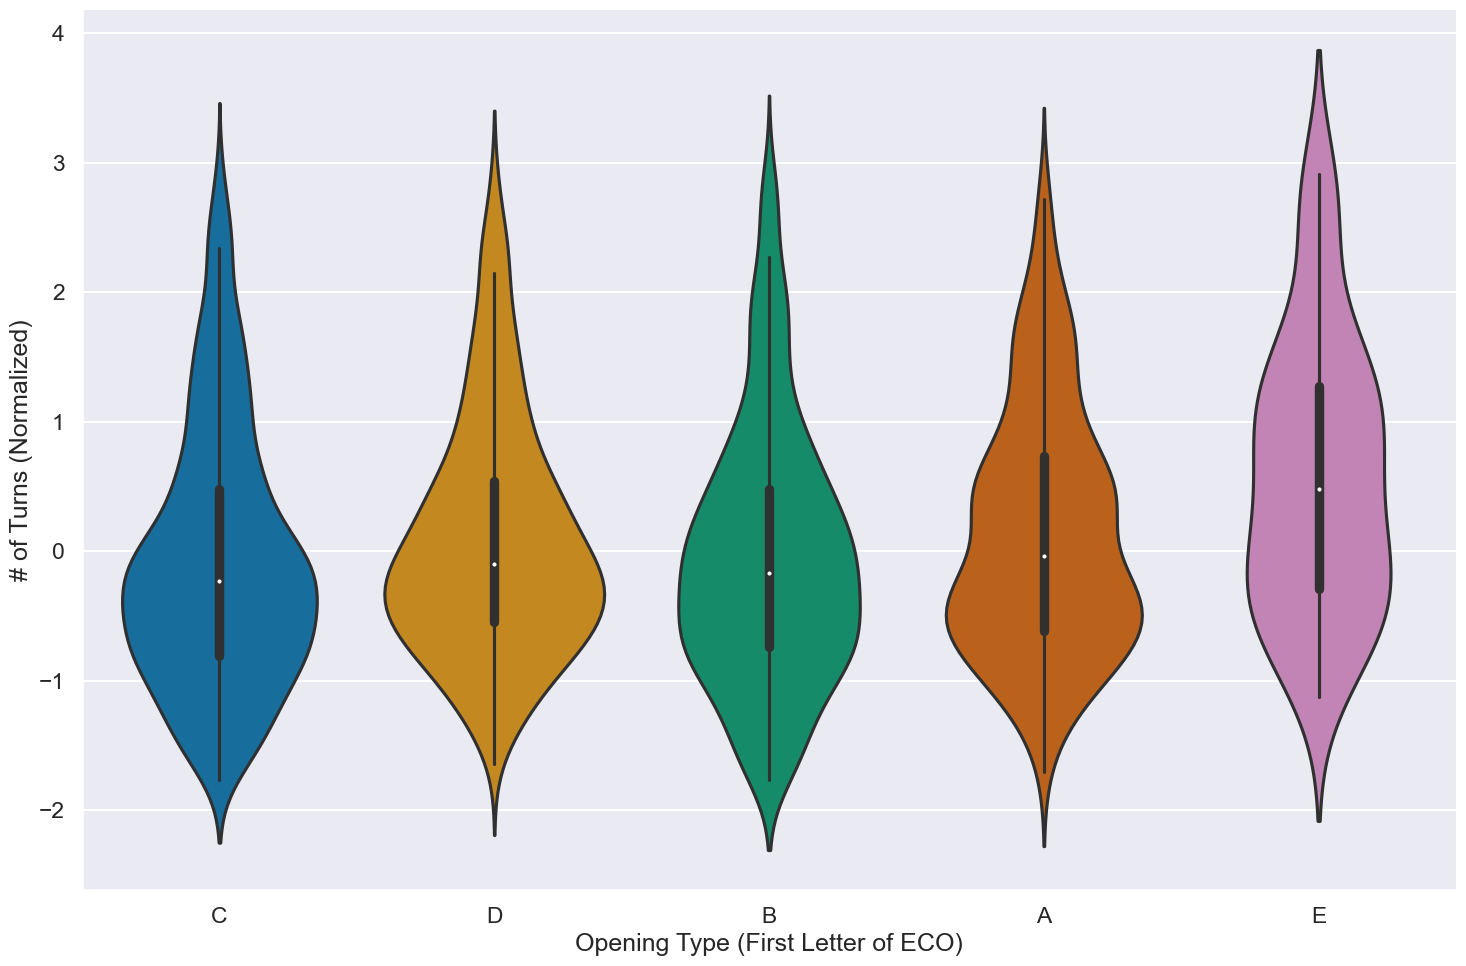

In [21]:
w_mates= w_wins.loc[(w_wins.victory_status == 'mate')]
w_mates["turns_norm"] = (w_mates["turns"]-w_mates["turns"].mean()) / w_mates["turns"].std()

w_mates['open_letter'] = w_mates['opening_eco'].str[:1]

x = sns.catplot(data=w_mates,x="open_letter", y="turns_norm", kind='violin', height=10, aspect=1.5)
x.set_axis_labels("Opening Type (First Letter of ECO)", "# of Turns (Normalized)")

# Number of Turns (Norm) by Opening Type when White Checkmates (Boxen Plot)

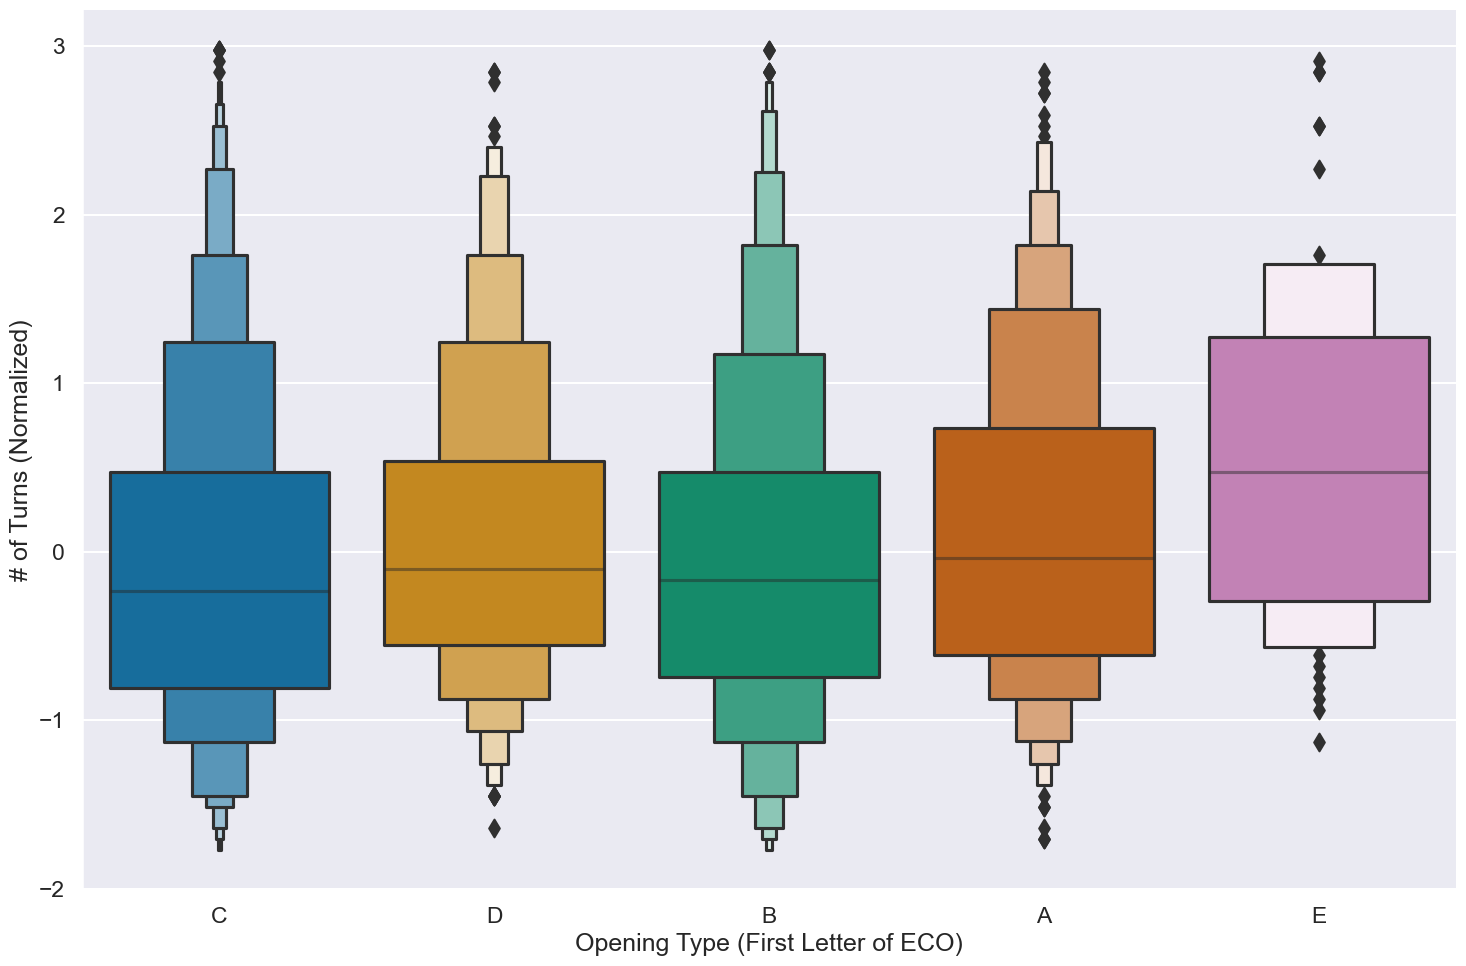

In [22]:
x = sns.catplot(data=w_mates,x="open_letter", y="turns_norm", kind='boxen', height=10, aspect=1.5)
x.set_axis_labels("Opening Type (First Letter of ECO)", "# of Turns (Normalized)")

### Those who play the C opening with white and win, are likely to do so faster than with any other type of opening

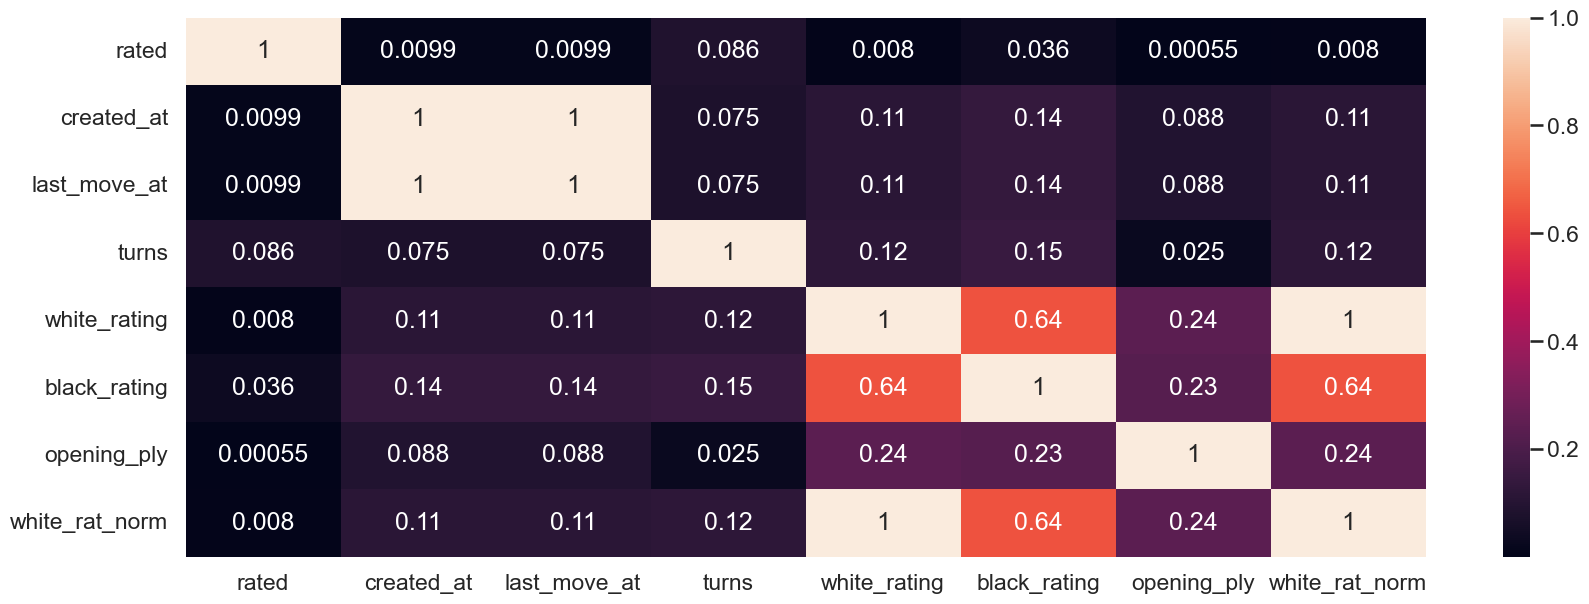

In [27]:
sns.heatmap(my_data.corr(), annot=True)

plt.rcParams['figure.figsize'] = (40,20)

plt.show()

### No significant correlations EXCEPT:
### - between Black and White Rating
### - between opening_ply and player rating

# Conclusions
* Longer games tend to have a longer opening phase
* Draws occur more often in games with a shorter opening phase
* Most chess games last around 50 turns
* Games in which Black wins tend to take slightly longer
* Games that end in a draw tend to last longer than games that have a winner
* Draws have a larger range of game length than wins or losses
* Rated games tend to last longer than unrated games
* When white wins on time, it is probable that the game will last longer than an average game (50 moves)
* Before the 30 move mark, resignation occurs more often than mates
* Those who play C openings (Kings Pawn) are more likely to be lower rated
* Those who play E openings (Queens Pawn) are much more likely to be a higher rated player
* Higher rated players tend to play a longer opening
* Those who play the C opening with white and win, are likely to do so faster than with any other type of opening